In [13]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

def split_cell_heatmap(data1, data2, cmap='viridis', figsize=(6, 6), show_percent_labels=True, colorbar_label='Value'):
    """
    Plot a heatmap where each cell is split into two triangles,
    one for data1 (top-left) and one for data2 (bottom-right),
    sharing the same color scale.

    Parameters:
        data1 (ndarray): 2D array of values for top-left triangle.
        data2 (ndarray): 2D array of values for bottom-right triangle.
        cmap (str or Colormap): Matplotlib colormap to use.
        figsize (tuple): Size of the figure.
        show_percent_labels (bool): Whether to show % labels on axes.
        colorbar_label (str): Label for the shared colorbar.
    """
    assert data1.shape == data2.shape, "data1 and data2 must have the same shape"
    nrows, ncols = data1.shape

    fig, ax = plt.subplots(figsize=figsize)

    # Normalize both datasets on the same scale
    combined_min = min(data1.min(), data2.min())
    combined_max = max(data1.max(), data2.max())
    norm = plt.Normalize(combined_min, combined_max)
    cmap = plt.get_cmap(cmap)

    for i in range(nrows):
        for j in range(ncols):
            x, y = j, i

            # Top-left triangle (data1)
            triangle1 = patches.Polygon([
                [x, y + 1],
                [x, y],
                [x + 1, y + 1]
            ], closed=True, facecolor=cmap(norm(data1[i, j])), edgecolor='none')
            ax.add_patch(triangle1)

            # Bottom-right triangle (data2)
            triangle2 = patches.Polygon([
                [x + 1, y],
                [x + 1, y + 1],
                [x, y]
            ], closed=True, facecolor=cmap(norm(data2[i, j])), edgecolor='none')
            ax.add_patch(triangle2)

    # Axis labels
    if show_percent_labels:
        x_percentages = np.linspace(0, 100, ncols, endpoint=False) + 100 / ncols / 2
        y_percentages = np.linspace(0, 100, nrows, endpoint=False) + 100 / nrows / 2

        ax.set_xticks(np.arange(ncols) + 0.5)
        ax.set_xticklabels([f"{int(p)}%" for p in x_percentages])
        ax.tick_params(axis='x', bottom=True, top=False, labelbottom=True)

        ax.set_yticks(np.arange(nrows) + 0.5)
        ax.set_yticklabels([f"{int(p)}%" for p in y_percentages])
        ax.tick_params(axis='y', left=True)

    else:
        ax.set_xticks([])
        ax.set_yticks([])

    ax.set_xlim(0, ncols)
    ax.set_ylim(0, nrows)
    ax.set_aspect('equal')

    # Shared colorbar
    sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
    fig.colorbar(sm, ax=ax, fraction=0.046, pad=0.04, label=colorbar_label)

    plt.tight_layout()
    plt.show()


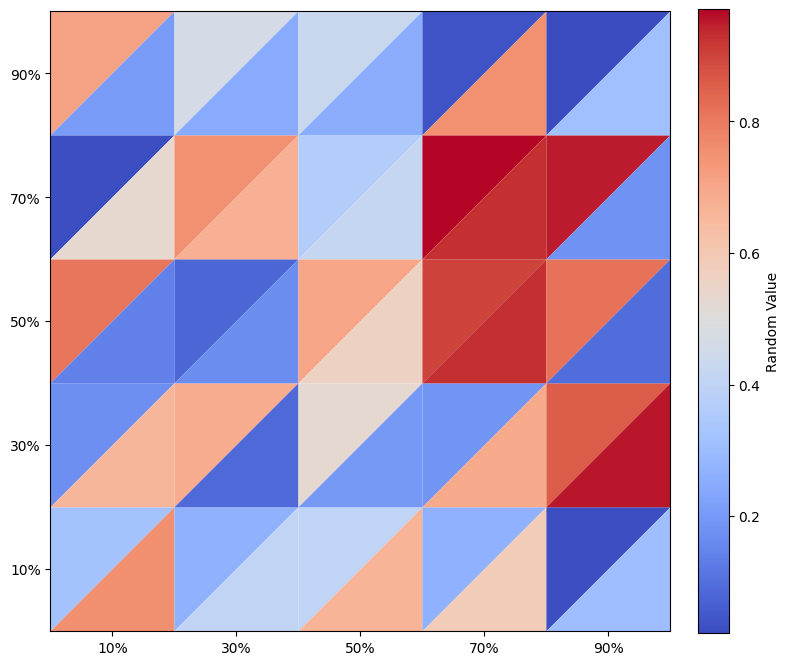

In [14]:
# Generate random data
random_data1 = np.random.rand(5, 5)
random_data2 = np.random.rand(5, 5)

# Plot the random data using the split_cell_heatmap function
split_cell_heatmap(random_data1, random_data2, cmap='coolwarm', figsize=(8, 8), show_percent_labels=True, colorbar_label='Random Value')